# Problem1

#### A. Collect the TAIEX from 2012/12/01 to 2021/12/02 (Day Bar).

In [1]:
import requests
import pandas as pd
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {
    "dataset": "TaiwanStockPrice",
    "data_id": "TAIEX",
    "start_date": "2012-12-01",
    "end_date": "2021-12-02"
}
r = requests.get(url, params=parameter)
data = r.json()
stock_deal_info = data["data"]
df_taiex=pd.DataFrame(stock_deal_info)
#print(df_taiex)
df_taiex=df_taiex.drop(columns=['date','stock_id','Trading_money', 'spread','Trading_turnover'],axis=1)
#df_taiex.to_csv("TAIEX2.csv")
#print(df_taiex)
df_taiex

,Trading_Volume,open,max,min,close
0,3696524900,7582.65,7628.29,7562.19,7599.91
1,3947860691,7572.11,7600.98,7536.66,7600.98
2,4858910844,7575.63,7650.12,7567.46,7649.05
3,4399887242,7660.97,7673.62,7616.79,7623.26
4,3888752378,7640.25,7672.92,7631.63,7642.26
...,...,...,...,...,...
2202,8639089532,17641.79,17641.79,17330.44,17369.39
2203,7721871866,17320.01,17415.63,17167.24,17328.09
2204,9057571836,17369.79,17535.23,17369.79,17427.76
2205,7020888193,17428.61,17626.21,17374.59,17585.99


#### B. Apply the triple-barrier method to label the collected data.

In [2]:
import numpy as np
label=[]
def triple_barrier(price, ub, lb):
    for i in range(price.shape[0]):
        today_price=price.iloc[i]
        for day in range(1,21):
            if(i+day)<price.shape[0]:
                compare_price=price.iloc[i+day]
                if today_price*ub<=compare_price:
                    label.append(1)
                    break
                elif today_price*lb>=compare_price:
                    label.append(2)
                    break
            if day==20:
                label.append(0)
                break
            if (i+day)==price.shape[0]:
                label.append(float("NaN"))
                break
triple_barrier(df_taiex.close, 1.04, 0.98)
triple_barrier_signal = pd.DataFrame({'triple_barrier_signal':label})
df_taiex=pd.concat([df_taiex,triple_barrier_signal["triple_barrier_signal"]],axis=1)
df_taiex
#df_taiex.to_csv("TAIEX2.csv")

,Trading_Volume,open,max,min,close,triple_barrier_signal
0,3696524900,7582.65,7628.29,7562.19,7599.91,0.0
1,3947860691,7572.11,7600.98,7536.66,7600.98,0.0
2,4858910844,7575.63,7650.12,7567.46,7649.05,0.0
3,4399887242,7660.97,7673.62,7616.79,7623.26,0.0
4,3888752378,7640.25,7672.92,7631.63,7642.26,0.0
...,...,...,...,...,...,...
2202,8639089532,17641.79,17641.79,17330.44,17369.39,NaN
2203,7721871866,17320.01,17415.63,17167.24,17328.09,NaN
2204,9057571836,17369.79,17535.23,17369.79,17427.76,NaN
2205,7020888193,17428.61,17626.21,17374.59,17585.99,NaN


#### C. Use “close price” to calculate 8 technical indicators of collected data.

##### i. Bios of moving average: 5-days, 10-days, 20-days, 60-day.

In [3]:
import talib
#5 days
MA_5_days = talib.MA(df_taiex.close, timeperiod = 5, matype = 0)
MA_bios_5_days=(df_taiex.close-MA_5_days)/MA_5_days
MA_bios_5_days = pd.DataFrame({'MA_bios_5_days':MA_bios_5_days})
df_taiex=pd.concat([df_taiex,MA_bios_5_days],axis=1)

#10 days
MA_10_days = talib.MA(df_taiex.close, timeperiod = 10, matype = 0)
MA_bios_10_days=(df_taiex.close-MA_10_days)/MA_10_days
MA_bios_10_days = pd.DataFrame({'MA_bios_10_days':MA_bios_10_days})
df_taiex=pd.concat([df_taiex,MA_bios_10_days],axis=1)

#20 days
MA_20_days = talib.MA(df_taiex.close, timeperiod = 20, matype = 0)
MA_bios_20_days=(df_taiex.close-MA_20_days)/MA_20_days
MA_bios_20_days = pd.DataFrame({'MA_bios_20_days':MA_bios_20_days})
df_taiex=pd.concat([df_taiex,MA_bios_20_days],axis=1)

#60 days
MA_60_days = talib.MA(df_taiex.close, timeperiod = 60, matype = 0)
MA_bios_60_days=(df_taiex.close-MA_60_days)/MA_60_days
MA_bios_60_days = pd.DataFrame({'MA_bios_60_days':MA_bios_60_days})
df_taiex=pd.concat([df_taiex,MA_bios_60_days],axis=1)

df_taiex

,Trading_Volume,open,max,min,close,triple_barrier_signal,MA_bios_5_days,MA_bios_10_days,MA_bios_20_days,MA_bios_60_days
0,3696524900,7582.65,7628.29,7562.19,7599.91,0.0,NaN,NaN,NaN,NaN
1,3947860691,7572.11,7600.98,7536.66,7600.98,0.0,NaN,NaN,NaN,NaN
2,4858910844,7575.63,7650.12,7567.46,7649.05,0.0,NaN,NaN,NaN,NaN
3,4399887242,7660.97,7673.62,7616.79,7623.26,0.0,NaN,NaN,NaN,NaN
4,3888752378,7640.25,7672.92,7631.63,7642.26,0.0,0.002514,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2202,8639089532,17641.79,17641.79,17330.44,17369.39,NaN,-0.014623,-0.018052,-0.007481,0.011709
2203,7721871866,17320.01,17415.63,17167.24,17328.09,NaN,-0.011634,-0.018687,-0.010575,0.009446
2204,9057571836,17369.79,17535.23,17369.79,17427.76,NaN,-0.003239,-0.011557,-0.005911,0.015146
2205,7020888193,17428.61,17626.21,17374.59,17585.99,NaN,0.006462,-0.001575,0.001789,0.024294


##### ii. RSI: 14 

In [4]:
RSI14=talib.RSI(df_taiex.close,14)
RSI14 = pd.DataFrame({'RSI14':RSI14})
df_taiex=pd.concat([df_taiex,RSI14],axis=1)
df_taiex

,Trading_Volume,open,max,min,close,triple_barrier_signal,MA_bios_5_days,MA_bios_10_days,MA_bios_20_days,MA_bios_60_days,RSI14
0,3696524900,7582.65,7628.29,7562.19,7599.91,0.0,NaN,NaN,NaN,NaN,NaN
1,3947860691,7572.11,7600.98,7536.66,7600.98,0.0,NaN,NaN,NaN,NaN,NaN
2,4858910844,7575.63,7650.12,7567.46,7649.05,0.0,NaN,NaN,NaN,NaN,NaN
3,4399887242,7660.97,7673.62,7616.79,7623.26,0.0,NaN,NaN,NaN,NaN,NaN
4,3888752378,7640.25,7672.92,7631.63,7642.26,0.0,0.002514,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2202,8639089532,17641.79,17641.79,17330.44,17369.39,NaN,-0.014623,-0.018052,-0.007481,0.011709,47.978541
2203,7721871866,17320.01,17415.63,17167.24,17328.09,NaN,-0.011634,-0.018687,-0.010575,0.009446,46.341245
2204,9057571836,17369.79,17535.23,17369.79,17427.76,NaN,-0.003239,-0.011557,-0.005911,0.015146,50.712590
2205,7020888193,17428.61,17626.21,17374.59,17585.99,NaN,0.006462,-0.001575,0.001789,0.024294,56.738044


##### iii. MACD(快線DIF), MACD signal(慢線), MACD histogram(柱狀)

In [5]:
df_taiex["MACD"],df_taiex["MACDsignal"],df_taiex["MACDhist"]=talib.MACD(df_taiex.close)
df_taiex

,Trading_Volume,open,max,min,close,triple_barrier_signal,MA_bios_5_days,MA_bios_10_days,MA_bios_20_days,MA_bios_60_days,RSI14,MACD,MACDsignal,MACDhist
0,3696524900,7582.65,7628.29,7562.19,7599.91,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3947860691,7572.11,7600.98,7536.66,7600.98,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4858910844,7575.63,7650.12,7567.46,7649.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4399887242,7660.97,7673.62,7616.79,7623.26,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3888752378,7640.25,7672.92,7631.63,7642.26,0.0,0.002514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,8639089532,17641.79,17641.79,17330.44,17369.39,NaN,-0.014623,-0.018052,-0.007481,0.011709,47.978541,157.215599,185.789159,-28.573559
2203,7721871866,17320.01,17415.63,17167.24,17328.09,NaN,-0.011634,-0.018687,-0.010575,0.009446,46.341245,125.218743,173.675075,-48.456333
2204,9057571836,17369.79,17535.23,17369.79,17427.76,NaN,-0.003239,-0.011557,-0.005911,0.015146,50.712590,106.673869,160.274834,-53.600965
2205,7020888193,17428.61,17626.21,17374.59,17585.99,NaN,0.006462,-0.001575,0.001789,0.024294,56.738044,103.551090,148.930085,-45.378996


##### iv. Save problem 1, 2, 3 to a csv

In [6]:
df_taiex = df_taiex.dropna()
print(df_taiex.shape)
#df_taiex
df_taiex.to_csv("TAIEX.csv")

(2134, 14)


# Problem2

#### A. The test data is the last 30% of the original data.

In [7]:
Train_df_taiex_x = df_taiex[:int(df_taiex.shape[0]*0.7)+1].drop(columns=["triple_barrier_signal"])
Train_df_taiex_y = df_taiex[:int(df_taiex.shape[0]*0.7)+1]["triple_barrier_signal"]
Test_df_taiex_x = df_taiex[int(df_taiex.shape[0]*0.7)+1:].drop(columns=["triple_barrier_signal"])
Test_df_taiex_y = df_taiex[int(df_taiex.shape[0]*0.7)+1:]["triple_barrier_signal"]

#### B. The parameter are: 
    i. 'bootstrap': [True], 
    ii. 'max_depth': [80, 90, 100, 110], 
    iii. 'max_features': [2, 3], 
    iv. 'min_samples_leaf': [3, 4, 5], 
    v. 'min_samples_split': [8, 10, 12], 
    vi. 'n_estimators': [100, 200, 300, 1000]

In [8]:
param_grid={"bootstrap":[True],
            "max_depth":[80,90,100,110],
            "min_samples_leaf":[3,4,5],
            "min_samples_split":[8,10,12],
            "n_estimators":[100,200,300,1000]}


#### C. Print the distribution of all data, training data and testing data.

In [9]:
#Train_df_taiex_y
print("訓練資料總數量:{}".format(Train_df_taiex_y.shape[0]))
print("訓練資料label=0數量:{}".format(Train_df_taiex_y[Train_df_taiex_y==0].shape[0]))
print("訓練資料label=1數量:{}".format(Train_df_taiex_y[Train_df_taiex_y==1].shape[0]))
print("訓練資料label=2數量:{}\n".format(Train_df_taiex_y[Train_df_taiex_y==2].shape[0]))

#Test_df_taiex_y
print("測試資料總數量:{}".format(Test_df_taiex_y.shape[0]))
print("測試資料label=0數量:{}".format(Test_df_taiex_y[Test_df_taiex_y==0].shape[0]))
print("測試資料label=1數量:{}".format(Test_df_taiex_y[Test_df_taiex_y==1].shape[0]))
print("測試資料label=2數量:{}".format(Test_df_taiex_y[Test_df_taiex_y==2].shape[0]))

訓練資料總數量:1494
訓練資料label=0數量:593
訓練資料label=1數量:271
訓練資料label=2數量:630

測試資料總數量:640
測試資料label=0數量:129
測試資料label=1數量:253
測試資料label=2數量:258


#### D. Apply 3-fold cross validation and grid search to tune the hyperparameter

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
randomforest = RandomForestClassifier()
clf = GridSearchCV(randomforest, param_grid,cv=3,return_train_score=True,n_jobs=4)
clf.fit(Train_df_taiex_x, Train_df_taiex_y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             return_train_score=True)

#### E. Print the best training score, best parameter and testing score of best estimator found from problem 2-D.

In [11]:
print("Best training score:{}\n".format(clf.cv_results_['mean_train_score'].max()))
print("Best val score:{}\n".format(clf.best_score_))
print("Best parameter:{}\n".format(clf.best_params_))
Test_Score = clf.best_estimator_.score(Test_df_taiex_x,Test_df_taiex_y)
print("Testing score of best estimator:{}\n".format(Test_Score))


Best training score:0.9661981258366801

Best val score:0.3755020080321285

Best parameter:{'bootstrap': True, 'max_depth': 110, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 100}

Testing score of best estimator:0.45



#### F. Plot the ROC curve of the best estimator found from problem 2-D. 

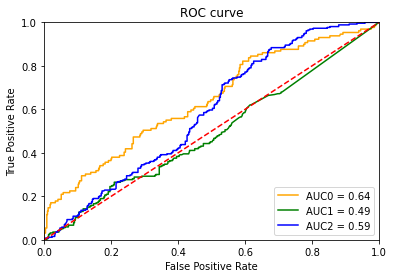

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
prediction = clf.best_estimator_.predict_proba(Test_df_taiex_x)
#print(prediction)
prediction0 = prediction[:,0]
Test_df_taiex_y0 = (Test_df_taiex_y==0)
prediction1 = prediction[:,1]
Test_df_taiex_y1 = (Test_df_taiex_y==1)
prediction2 = prediction[:,2]
Test_df_taiex_y2 = (Test_df_taiex_y==2)
fpr, tpr, threshold = roc_curve(Test_df_taiex_y0, prediction0)
fpr1, tpr1, threshold1 = roc_curve(Test_df_taiex_y1, prediction1)
fpr2, tpr2, threshold2 = roc_curve(Test_df_taiex_y2, prediction2)
#print(fpr, tpr, threshold)
auc0 = auc(fpr, tpr)
auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)
## Plot the result
plt.title('ROC curve')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC0 = %0.2f' % auc0)
plt.plot(fpr1, tpr1, color = 'green', label = 'AUC1 = %0.2f' % auc1)
plt.plot(fpr2, tpr2, color = 'blue', label = 'AUC2 = %0.2f' % auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()   